# Model Project 
***

_In this model project we will present a simple Robinson Crusoe production economy. We will solve the model analytically using sympy, evaluate the markets in different parameterizations of price and wage and visualize one solution_ 

## The theoretical model:
Imagine that Crusoe is schizophenic and makes his decisions as a manager and consumer separately. His decsisions are however, guided by market prices - labor wage and consumption price. It is assumed that Crusoe is endowed with a total time endowment of 60 hours per week. 


<br> **Producer problem:** When Crusoe acts as a manager he seeks to maximize his profit subject to the production function while taking the price and wage as given. 
<br>
\\[ \max_{x,l} px-wl \\]

subject to

\\[ x=f(l)=Al^\beta \\]

<br> Where p is the market price of the good, w is the wage, x is the good and l is labor. A and $\beta$ reflect technology and returns to scale, respectively.

<br> **Consumer problem:** When acting as a consumer, Crusoe maximizes his utility of the consumption good x and leisure (the latter is defined as whats left of total time endowment when working l hours)
<br>
As the consumer and owner of the firm, Crusoe will receive profit from "selling"  his labor in the producer problem.
<br>
\\[ \max_{x,l} u(x,(L-l))=x^\alpha(L-l)^{(1-\alpha)} \\]

subject to

\\[ px=wl+\pi(w,p) \\]

<br> When solving the model, we need to derive demand and supply expressions for labor and the consumption good. When equalizing supply and demand in one of the markets and acquiring an equilibrium, it follows from Walras' law that the other market will also reach an equilibrium.

<br>
Hence, the model is solved by first optimizing in the markets separately, deriving the supply and demand expressions, then equalizing supply and demand across markets and solving for the consumption price and labor wage.

## The analytical solution:

Install packages.  

In [325]:
import numpy as np
import sympy as sm

%matplotlib inline
import matplotlib.pyplot as plt

In the follwoing, we will primarily analyze the model using sympy. However, due to computational problems when solving the model using sympy with algebraic expressions only (see https://docs.sympy.org/0.7.6/tutorial/solvers.html), we define some of the parameter values as the following:  

In [310]:
A = 13.15
beta = 0.5
alpha = 2/3 
L = 60
I = 10

### Producer problem:
The producer problem is quite simple and the easiest way to solve the maximization problem is to substitute the constraint (production function) into the profit function, deriving the reduced form.  

In [277]:
# Profit function
def prof(x,l):
    return p*x-w*l

# Production function
def prod(l):
    return A*l**beta

# Reduced form - subsituting production function into profit function
def reduced(l):
    return prof(prod(l),l)

Substituting for x and maximizing w.r.t labor (l):

In [328]:
# Optimization using sympy diff:
focProd = sm.diff(reduced(l),l)

# Isolating labor and thus, deriving labor demand:
laborDemand = sm.solve(focProd,l)

# Finding the supply of goods:
profSubs = prof(x,laborDemand[0])
goodSupply = sm.solve(profSubs,x)

# Printing labor demand and goods supply 
print("Labor demand: lD=", laborDemand)
print("supply of goods: xS=", goodSupply)

Labor demand: lD= [43.230625*p**2/w**2]
supply of goods: xS= [43.230625*p/w]


Profit, as a function of w and p, is derived by inserting labor demand and goods supply into the profit function:

In [261]:
Profit = (1-beta)*(A*p)**(1/(1-beta))*(beta/w)**(beta/(1-beta))
print(Profit)

43.230625*p**2.0*(1/w)**1.0


### Consumer problem:
The consumer problem is not as simple as the producer problem and we solve this using sympy's version of lagrange.

In [329]:
# The variables to maximize w.r.t
x, l = sm.var('x,l',real=True)

# The objective function
util = x**alpha*(L-l)**(1-alpha)

# Budget constraint
bud = p*x-w*l-Profit

# Specifying the shadow price
lam = sm.symbols('lambda',real = True)

# Setting up the Lagragian
L = util-lam*bud


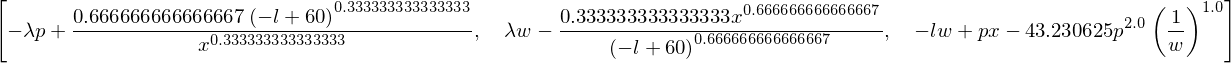

In [332]:
# Differentiating w.r.t x and l
gradL = [sm.diff(L,c) for c in [x,l]]

# The focs and the shadow price
KKT_eqs = gradL + [bud]
KKT_eqs

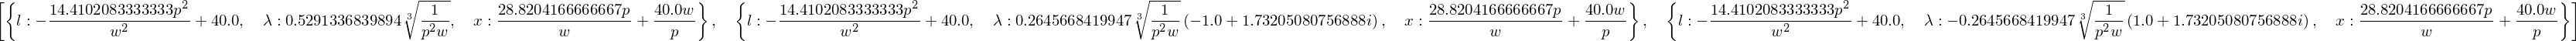

In [333]:
# Showing the stationary points solving the constrained problem
stationary_points = sm.solve(KKT_eqs,[x,l,lam],dict=True)
stationary_points

We note that all proposed solutions of l and x are the same. The only variation between the three proposed solutions is the shadow price. Hence, we proceed with the solutions of l and x and derive the optimal wage. This is done by equalizing supply and demand of labor, hence, obtaining equilibrium in one market.

In [244]:
equalLab = sm.Eq(-14.4102083333333*p**2/w**2+40,43.230625*p**2/w**2)
opt_wag = sm.solve(equalLab,w)

print("Optimal wage depending on price", opt_wag)

Optimal wage depending on price [-1.20042527186549*p, 1.20042527186549*p]


Since the price cannot be negative the solution is 1.2*p. This means that any set of prices will imply an approximately 1.2 times higher wage with equilibrium in both markets. In the following, we evaluate the optimal wage expression and labor demand in different values of p and hence, w. 

In [369]:
# We convert the symbolic optimal wage expression a function depending of p
_opt_wag = sm.lambdify(p,opt_wag[1])

# We evaluate the wage in a price of 10 and 1, respectively. 
p1_vec = np.array([10,1])
wages = _opt_wag(p1_vec)
print("Optimal wage, when price is 10 and 1, respectively: ",wages)

# We evaluate the labor demand in the prices and wages. First making the labor demand 
# expression a function depending on p and w.
_lab_dem = sm.lambdify((p,w),laborDemand)
p1_vec = np.array([10,1])

# Labor demand evaluated in price and wages.
labor_dem1 = [_lab_dem(p1_vec[0],wages[0]), _lab_dem(p1_vec[1],wages[1])]
print("Labor demand evaluated in combination of wages and prices: ", labor_dem1)

# Labor supply from lagrange optimization problem
_lab_sup = [-14.4102083333333*p1_vec[0]**2/wages[0]**2+40,-14.4102083333333*p1_vec[1]**2/wages[1]**2+40]
print("Labor supply evaluated in combination of wages and prices: ", _lab_sup)

# Profit in different combination of wages and prices
Profit_eval = 43.230625*p1_vec**2.0*(1/wages)**1.0
print("Profit evaluated in combination of prices and wages:", [Profit_eval[0], Profit_eval[1]])

# Demand of consumption good
good_opt = prod(30)
print("Demand and supply of consumption good: ", good_opt)

# Utility in different combination of wages and prices
_utility = sm.lambdify((x,l),util)
print("Utility evaluated in combination of prices and wages:", _utility(good_opt,30))

Optimal wage, when price is 10 and 1, respectively:  [12.00425272  1.20042527]
Labor demand evaluated in combination of wages and prices:  [[29.999999999999954], [29.999999999999957]]
Labor supply evaluated in combination of wages and prices:  [30.00000000000004, 30.000000000000036]
Profit evaluated in combination of prices and wages: [360.12758155964644, 36.01275815596465]
Demand and supply of consumption good:  72.02551631192935
Utility evaluated in combination of prices and wages: 53.78956164406131


## Visualization:

We now visualize the solution when the price is 1 and the wage is 1.2.

Text(0, 0.5, 'x')

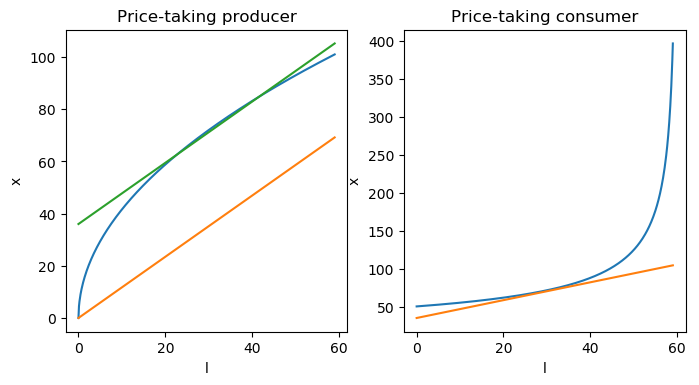

In [324]:
def prof_ny(x,l,profit):
    return 1*x-1.2*l+profit

def util_ny(l, profit):
    return (profit/((L-l)**(1-alpha)))**(1/alpha)

def budget_ny(x,l,profit):
    return x-1.2*l+profit

fig = plt.figure(figsize=(8,4),dpi=100) 

labor_vec = np.linspace(0,59,500)
goods_vec = np.linspace(0,140,500)

ax_left = fig.add_subplot(1,2,1)
ax_left.plot(labor_vec, prod(labor_vec))
ax_left.plot(labor_vec, prof_ny(goods_vec,labor_vec,0))
ax_left.plot(labor_vec, prof_ny(goods_vec,labor_vec,Profit_eval[1]))
ax_left.set_title('Price-taking producer')
ax_left.set_xlabel('l')
ax_left.set_ylabel('x')

ax_right = fig.add_subplot(1,2,2)
ax_right.plot(labor_vec, util_ny(labor_vec,54))
ax_right.plot(labor_vec, budget_ny(goods_vec,labor_vec,Profit_eval[1]))
ax_right.set_title('Price-taking consumer')
ax_right.set_xlabel('l')
ax_right.set_ylabel('x')


The found solution of p=1 and w=1,2 is represented by the tangency of the isoprofit curve and the production plan in the left panel at the tangency of the budget constraint and indifference curve at the right panel.